In [1]:
from pandas_datareader import data
# https://github.com/ranaroussi/fix-yahoo-finance
# 야후 데이터 가져오는게 문제가 있어서 이걸 써줘야된다
import fix_yahoo_finance as yf

yf.pdr_override()  # <== that's all it takes :-)


class StockData:
    """
    arg stock = {
        "ticker": ticker_val, ...string
        "market": kospi, kosdaq, nasdaq, ...string
    }
    """
    def __init__(self):
        pass

    def format_ticker(stock):
        pass

    def _get_kospi(self, stock):  # conventional private naming
        ticker = stock['ticker']
        return data.get_data_google(ticker)

    def _get_kosdaq(self, stock):
        ticker = stock['ticker']
        return data.get_data_yahoo(ticker)

    def _get_nasdaq(self, stock):
        ticker = stock['ticker']
        return data.get_data_google(ticker)

    def error(self, stock):
        raise Exception('unexpected market name {}'.format(stock['market']))

    def get_csv(self, stock):
        mname = '_get_' + stock['market']
        if hasattr(self, mname):
            print(mname)
            method = getattr(self, mname)
            return method(stock)
        else:
            self.error(stock)

stock_api = StockData()




/Users/jacky/Documents/github/webProgramming/system-trading/venv/lib/python2.7/site-packages/fix_yahoo_finance/__init__.py:43: DeprecationWarning: 
    Auto-overriding of pandas_datareader's get_data_yahoo() is deprecated and will be removed in future versions.
    Use pdr_override() to explicitly override it.
  DeprecationWarning)


In [2]:
naver = stock_api.get_csv({
                'ticker': 'KRX:035420',
                'market': 'kospi',
            })

_get_kospi


In [3]:
afreeca = stock_api.get_csv({
                'ticker': '067160.KQ',
                'market': 'kosdaq',
            })

_get_kosdaq
[*********************100%***********************]  1 of 1 downloaded

In [4]:
import matplotlib.pyplot as plt

In [6]:
#ma: movement average 이동평균
naver_ma = dict()
naver_ma['05'] = naver['Close'].rolling(window=5).mean()
naver_ma['20'] = naver['Close'].rolling(window=20).mean()
naver_ma['60'] = naver['Close'].rolling(window=60).mean()
naver_ma['120'] = naver['Close'].rolling(window=120).mean()

In [7]:
plt.plot(naver_ma['05'], label='05')
plt.plot(naver_ma['20'], label='20')
plt.plot(naver_ma['60'], label='60')
plt.plot(naver_ma['120'], label='120')

In [8]:
plt.legend(loc='best')
plt.grid()

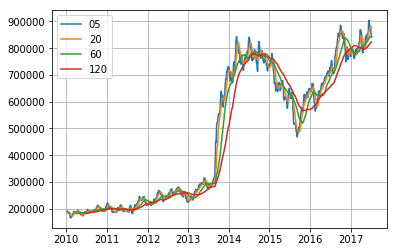

In [9]:
plt.show()